In [ ]:
import os 
from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
 https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-03-18 03:20:28--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   157MB/s    in 0.5s    

2021-03-18 03:20:29 (157 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top = False,
                                weights = None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(4, activation='softmax')(x)
model = Model(pre_trained_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
!git clone https://github.com/Aditi0102/tree-image-dataset.git

Cloning into 'tree-image-dataset'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 360 (delta 0), reused 357 (delta 0), pack-reused 0
Receiving objects: 100% (360/360), 4.36 MiB | 3.68 MiB/s, done.


In [ ]:
!ls


sample_data  tree-image-dataset


In [ ]:
base_dir = '/content/tree-image-dataset'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

train_apples_dir = os.path.join(train_dir, 'apples')
train_bananas_dir = os.path.join(train_dir, 'bananas')
train_banyan_dir = os.path.join(train_dir, 'banyan')
train_pine_dir = os.path.join(train_dir, 'pine')

validation_apples_dir = os.path.join(validation_dir, 'apples')
validation_bananas_dir = os.path.join(validation_dir, 'bananas')
validation_banyan_dir = os.path.join(validation_dir, 'banyan')
validation_pine_dir = os.path.join(validation_dir, 'pine')

In [ ]:
train_apples_fnames = os.listdir(train_apples_dir)
train_bananas_fnames = os.listdir(train_bananas_dir)
train_banyan_fnames = os.listdir(train_banyan_dir)
train_pine_fnames = os.listdir(train_pine_dir)

print(train_apples_fnames[:10])
print(train_bananas_fnames[:10])
print(train_banyan_fnames[:10])
print(train_pine_fnames[:10])

['apple57.jpg', 'apple37.jpg', 'apple23.jpg', 'apple10.jpg', 'apple18.jpg', 'apple2.jpg', 'apple17.jpg', 'apple59.jpg', 'apple34.jpg', 'apple22.jpg']
['banana5.jpg', 'banana62.jpg', 'banana31.jpg', 'banana69.jpg', 'banana56.jpg', 'banana53.jpg', 'banana25.jpg', 'banana57.jpg', 'banana4.jpg', 'banana44.jpg']
['banyan60.jpg', 'banyan38.jpg', 'banyan61.jpg', 'banyan34.jpg', 'banyan59.jpg', 'banyan58.jpg', 'banyan10.jpg', 'banyan31.jpg', 'banyan45.jpg', 'banyan62.jpg']
['pine16.jpg', 'pine7.jpg', 'pine46.jpg', 'pine8.jpg', 'pine22.jpg', 'pine40.jpg', 'pine24.jpg', 'pine5.jpg', 'pine49.jpg', 'pine32.jpg']


In [ ]:
print('total training apple images: ', len(os.listdir(train_apples_dir)))
print('total training banana images: ', len(os.listdir(train_bananas_dir)))
print('total training banyan images: ', len(os.listdir(train_banyan_dir)))
print('total training pine images: ', len(os.listdir(train_pine_dir)))

print('total validation apple images :', len(os.listdir(validation_apples_dir)))
print('total validation banana images :', len(os.listdir(validation_bananas_dir)))
print('total validation banyan images :', len(os.listdir(validation_banyan_dir)))
print('total validation pine images :', len(os.listdir(validation_pine_dir)))

total training apple images:  58
total training banana images:  96
total training banyan images:  66
total training pine images:  75
total validation apple images : 14
total validation banana images : 24
total validation banyan images : 16
total validation pine images : 19


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
   )

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 5,
    class_mode = 'categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='categorical'
)

Found 295 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=59,
    epochs=20,
    validation_data = validation_generator,
    validation_steps = 14,
    verbose = 1
)

Epoch 1/20
59/59 [==============================] - 36s 58ms/step - loss: 1.3112 - accuracy: 0.5459 - val_loss: 0.3153 - val_accuracy: 0.8857
Epoch 2/20
59/59 [==============================] - 2s 41ms/step - loss: 0.5177 - accuracy: 0.8042 - val_loss: 0.1308 - val_accuracy: 0.9429
Epoch 3/20
59/59 [==============================] - 2s 41ms/step - loss: 0.3201 - accuracy: 0.9040 - val_loss: 0.2125 - val_accuracy: 0.9143
Epoch 4/20
59/59 [==============================] - 2s 41ms/step - loss: 0.4484 - accuracy: 0.8808 - val_loss: 0.1839 - val_accuracy: 0.9286
Epoch 5/20
59/59 [==============================] - 2s 41ms/step - loss: 0.2398 - accuracy: 0.8962 - val_loss: 0.5529 - val_accuracy: 0.8714
Epoch 6/20
59/59 [==============================] - 2s 40ms/step - loss: 0.3018 - accuracy: 0.9151 - val_loss: 0.1495 - val_accuracy: 0.9571
Epoch 7/20
59/59 [==============================] - 2s 41ms/step - loss: 0.1824 - accuracy: 0.9340 - val_loss: 0.0785 - val_accuracy: 0.9714
Epoch 8/20
5

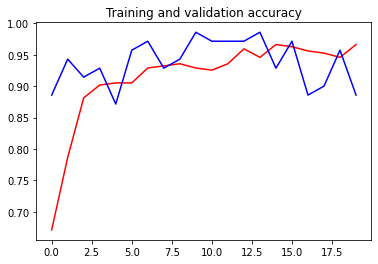

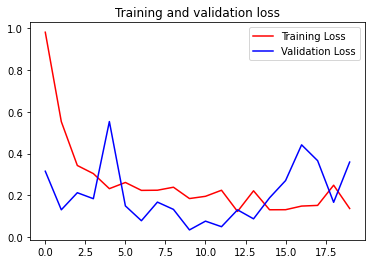

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import time
t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1616037769.h5


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
import tensorflow as tf


In [ ]:

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

x = layers.Dense(1024, activation='relu')(x)


x = layers.Dropout(0.2)(x)

x = layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
   )

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 5,
    class_mode = 'categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='categorical'
)

Found 295 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=59,
    epochs=20,
    validation_data = validation_generator,
    validation_steps = 14,
    verbose = 1)

Epoch 1/20
59/59 [==============================] - 3s 41ms/step - loss: 1.6569 - accuracy: 0.4222 - val_loss: 0.9494 - val_accuracy: 0.5143
Epoch 2/20
59/59 [==============================] - 2s 40ms/step - loss: 0.7428 - accuracy: 0.6749 - val_loss: 0.4864 - val_accuracy: 0.8000
Epoch 3/20
59/59 [==============================] - 2s 37ms/step - loss: 0.5396 - accuracy: 0.7911 - val_loss: 0.4689 - val_accuracy: 0.8429
Epoch 4/20
59/59 [==============================] - 2s 37ms/step - loss: 0.4179 - accuracy: 0.8662 - val_loss: 0.3800 - val_accuracy: 0.8714
Epoch 5/20
59/59 [==============================] - 2s 37ms/step - loss: 0.4736 - accuracy: 0.8318 - val_loss: 0.4063 - val_accuracy: 0.8143
Epoch 6/20
59/59 [==============================] - 2s 37ms/step - loss: 0.4612 - accuracy: 0.8371 - val_loss: 0.3703 - val_accuracy: 0.9000
Epoch 7/20
59/59 [==============================] - 2s 37ms/step - loss: 0.3678 - accuracy: 0.8807 - val_loss: 0.3587 - val_accuracy: 0.8429
Epoch 8/20
59

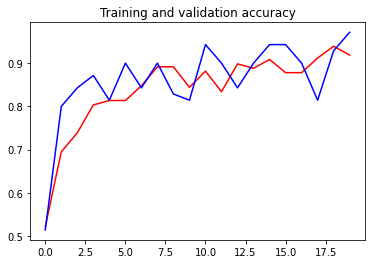

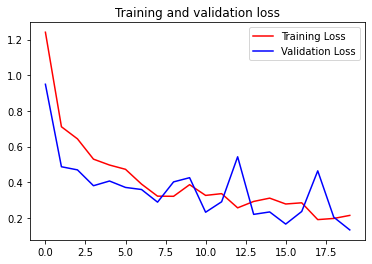

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import time
t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1616037897.h5


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)

x = layers.Dense(1024, activation='relu')(x)


x = layers.Dropout(0.2)(x)

x = layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
   )

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 5,
    class_mode = 'categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='categorical'
)

Found 295 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=59,
    epochs=20,
    validation_data = validation_generator,
    validation_steps = 14,
    verbose = 1)

Epoch 1/20
59/59 [==============================] - 6s 61ms/step - loss: 2.7389 - accuracy: 0.2728 - val_loss: 1.5488 - val_accuracy: 0.2857
Epoch 2/20
59/59 [==============================] - 3s 46ms/step - loss: 1.7991 - accuracy: 0.3135 - val_loss: 1.6220 - val_accuracy: 0.4143
Epoch 3/20
59/59 [==============================] - 3s 47ms/step - loss: 1.4633 - accuracy: 0.4273 - val_loss: 1.2444 - val_accuracy: 0.4571
Epoch 4/20
59/59 [==============================] - 3s 45ms/step - loss: 1.4317 - accuracy: 0.3922 - val_loss: 1.2075 - val_accuracy: 0.4714
Epoch 5/20
59/59 [==============================] - 3s 44ms/step - loss: 1.4336 - accuracy: 0.2948 - val_loss: 1.3479 - val_accuracy: 0.2571
Epoch 6/20
59/59 [==============================] - 3s 43ms/step - loss: 1.3280 - accuracy: 0.3665 - val_loss: 1.3476 - val_accuracy: 0.4571
Epoch 7/20
59/59 [==============================] - 3s 43ms/step - loss: 1.3145 - accuracy: 0.4480 - val_loss: 1.4578 - val_accuracy: 0.2714
Epoch 8/20
59

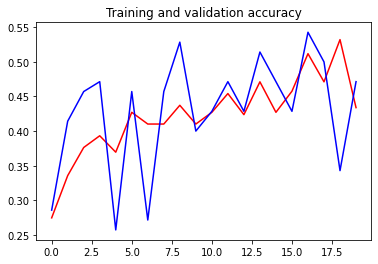

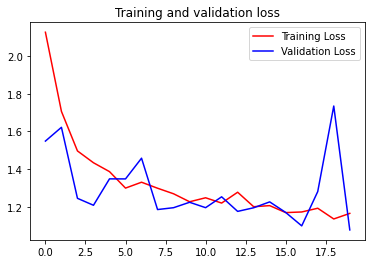

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import time
t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1616038017.h5
